In [4]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [5]:
df = pd.read_csv("dataset_Facebook.csv",encoding = 'utf8',sep=";")
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


In [6]:
df.dtypes

Page total likes                                                         int64
Type                                                                    object
Category                                                                 int64
Post Month                                                               int64
Post Weekday                                                             int64
Post Hour                                                                int64
Paid                                                                   float64
Lifetime Post Total Reach                                                int64
Lifetime Post Total Impressions                                          int64
Lifetime Engaged Users                                                   int64
Lifetime Post Consumers                                                  int64
Lifetime Post Consumptions                                               int64
Lifetime Post Impressions by people who have liked y

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 19 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 499 non-null    float64
 7   Lifetime

In [8]:
#Type of content
df.Type.unique()

array(['Photo', 'Status', 'Link', 'Video'], dtype=object)

In [9]:
#Manual content characterization: action (specifal offersand contents) , product (direct advertisment,
#explicit brand content) and inspiration (non-explicit brand related)
df.Category.unique()

array([2, 3, 1])

In [10]:
df['Post Month'].unique()

array([12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [11]:
df['Post Weekday'].unique()

array([4, 3, 2, 1, 7, 6, 5])

In [12]:
df['Post Hour'].unique()

array([ 3, 10,  9,  5, 12, 11,  2,  4,  8, 13,  7,  6,  1, 14, 23, 22, 15,
       20, 19, 18, 17, 16])

In [13]:
#If the company paid to facebook for advertising (yes,no)
print(df['Paid'].unique())

[ 0.  1. nan]


In [14]:
#add relevant columns for dates and categories 
df['Month'] = df['Post Month'].apply(lambda x: calendar.month_abbr[x])
df['Day'] = df['Post Weekday'].apply(lambda x: calendar.day_abbr[x - 1])

catType = {
    '1': 'Manual action',
    '2': 'Product',
    '3': 'Inspiration'
}

df['CategoryType']  = df.Category.apply(lambda x: catType[str(x)])

#Remove nan
df.like = df.like.fillna(0)
df.share = df.share.fillna(0)
df.Paid = df.Paid.fillna(0)

df.head(5)


,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,...,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions,Month,Day,CategoryType
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,...,3078,1640,119,4,79.0,17.0,100,Dec,Thu,Product
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,...,11710,6112,1108,5,130.0,29.0,164,Dec,Wed,Product
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,...,2812,1503,132,0,66.0,14.0,80,Dec,Wed,Inspiration
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,...,61027,32048,1386,58,1572.0,147.0,1777,Dec,Tue,Product
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,...,6228,3200,396,19,325.0,49.0,393,Dec,Tue,Product


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 22 columns):
 #   Column                                                               Non-Null Count  Dtype  
---  ------                                                               --------------  -----  
 0   Page total likes                                                     500 non-null    int64  
 1   Type                                                                 500 non-null    object 
 2   Category                                                             500 non-null    int64  
 3   Post Month                                                           500 non-null    int64  
 4   Post Weekday                                                         500 non-null    int64  
 5   Post Hour                                                            500 non-null    int64  
 6   Paid                                                                 500 non-null    float64
 7   Lifetime

In [16]:

dfByMonth = df.groupby(['Post Month'])['Lifetime Engaged Users'].sum().reset_index()
dfByMonth['Month'] = dfByMonth['Post Month'].apply(lambda x: calendar.month_abbr[x])
dfByMonth

,Post Month,Lifetime Engaged Users,Month
0,1,25851,Jan
1,2,38375,Feb
2,3,35316,Mar
3,4,44197,Apr
4,5,31167,May
5,6,46944,Jun
6,7,59876,Jul
7,8,27769,Aug
8,9,32982,Sep
9,10,49518,Oct


<AxesSubplot:xlabel='Post Month'>

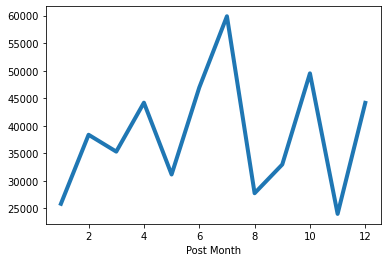

In [17]:
df.groupby(['Post Month'])['Lifetime Engaged Users'].sum().plot(linewidth = 4)

<AxesSubplot:xlabel='Post Month'>

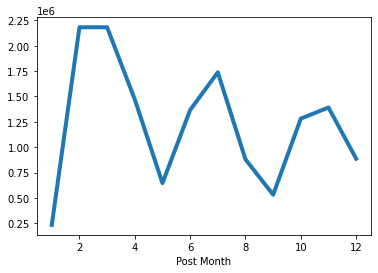

In [18]:
df.groupby(['Post Month'])['Lifetime Post Total Impressions'].sum().plot(linewidth = 4)

<AxesSubplot:xlabel='Post Month'>

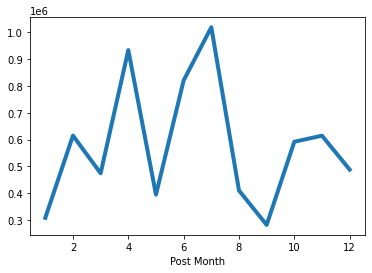

In [19]:
df.groupby(['Post Month'])['Lifetime Post Total Reach'].sum().plot(linewidth = 4)

<AxesSubplot:xlabel='Post Month'>

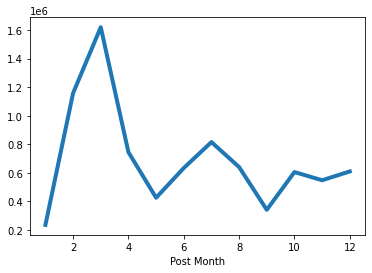

In [20]:
df.groupby(['Post Month'])['Lifetime Post Impressions by people who have liked your Page'].sum().plot(linewidth = 4)

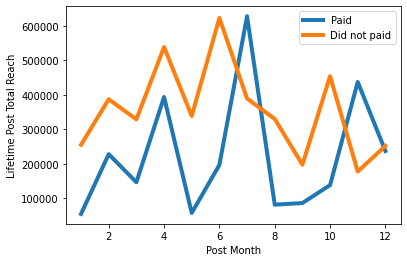

In [21]:
df[df['Paid'] == 1].groupby(['Post Month'])['Lifetime Post Total Reach'].sum().plot(linewidth = 4)
df[df['Paid'] == 0].groupby(['Post Month'])['Lifetime Post Total Reach'].sum().plot(linewidth = 4)

plt.legend(["Paid", "Did not paid"], loc ="upper right")


plt.xlabel('Post Month')
plt.ylabel('Lifetime Post Total Reach')
plt.show()

<AxesSubplot:xlabel='Type', ylabel='count'>

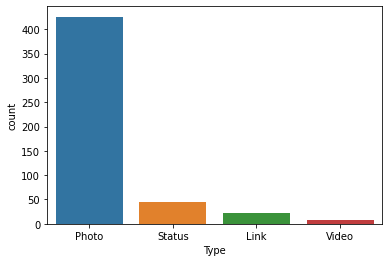

In [22]:
sns.countplot(x=df["Type"])

<AxesSubplot:ylabel='Type'>

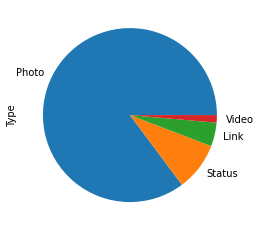

In [23]:
df['Type'].value_counts().plot(kind='pie')


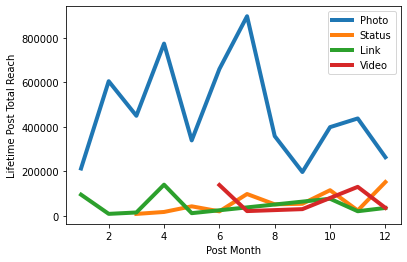

In [24]:
df[df['Type'] == 'Photo'].groupby(['Post Month'])['Lifetime Post Total Reach'].sum().plot(linewidth = 4)
df[df['Type'] == 'Status'].groupby(['Post Month'])['Lifetime Post Total Reach'].sum().plot(linewidth = 4)
df[df['Type'] == 'Link'].groupby(['Post Month'])['Lifetime Post Total Reach'].sum().plot(linewidth = 4)
df[df['Type'] == 'Video'].groupby(['Post Month'])['Lifetime Post Total Reach'].sum().plot(linewidth = 4)

plt.legend(["Photo", "Status","Link","Video"], loc ="upper right")


plt.xlabel('Post Month')
plt.ylabel('Lifetime Post Total Reach')
plt.show()

In [25]:
#Generar nuevo dataset 
df.to_csv('newFacebookDataset.csv')

# Relevant graphs for study

In [26]:
# Relevant graphs for study
df = pd.read_csv('newFacebookDataset.csv')

### Encontrar el tipo de campañas con mayor impacto en el año


In [27]:
# Encontrar el tipo de campañas con mayor impacto en el año 

#interesting var to sum
varToSum = 'Lifetime Engaged Users'
dfByMonth = df.groupby(['Post Month', 'Month'])[varToSum].sum().reset_index()

dfByType = df.groupby(['Type'])[varToSum].sum().reset_index()

dfByCategory = df.groupby(['CategoryType'])[varToSum].sum().reset_index()

dfByCategoryAndType = df.groupby(['Type','CategoryType'])[varToSum].sum().reset_index()
dfByCategoryAndType


,Type,CategoryType,Lifetime Engaged Users
0,Link,Inspiration,282
1,Link,Manual action,7157
2,Link,Product,103
3,Photo,Inspiration,125033
4,Photo,Manual action,157662
5,Photo,Product,66176
6,Status,Inspiration,3878
7,Status,Manual action,6224
8,Status,Product,81708
9,Video,Manual action,11949


### Diferencias entre campañas de paga y las gratuitas y su distribucion por post

In [28]:
## Diferencias entre campañas de paga donde 0 es sin paga y 1 es de paga y su
# efecto en la cantidad de usuarios alcanzados

dfByPaidCampaign = df.groupby(['Paid'])[varToSum].sum().reset_index()

dfByPaidCampaignAndType = df.groupby(['Paid', 'Type'])[varToSum].sum().reset_index()
dfByPaidCampaignAndTypeCount = df.groupby(['Paid', 'Type'])[varToSum].count().reset_index()
dfByPaidCampaignAndTypeCount['Count'] = dfByPaidCampaignAndTypeCount[varToSum]
del dfByPaidCampaignAndTypeCount[varToSum]

dfByPaidCampaignAndType = pd.merge(dfByPaidCampaignAndType, dfByPaidCampaignAndTypeCount, how='left', left_on=['Paid', 'Type'], right_on=['Paid', 'Type'])
dfByPaidCampaignAndType['UsersPerPost'] = dfByPaidCampaignAndType[varToSum] / dfByPaidCampaignAndType.Count
dfByPaidCampaignAndType.sort_values('UsersPerPost')

,Paid,Type,Lifetime Engaged Users,Count,UsersPerPost
4,1.0,Link,1373,6,228.833333
0,0.0,Link,6169,16,385.562500
1,0.0,Photo,227992,307,742.644951
5,1.0,Photo,120879,119,1015.789916
3,0.0,Video,4376,3,1458.666667
7,1.0,Video,7573,4,1893.250000
2,0.0,Status,67828,35,1937.942857
6,1.0,Status,23982,10,2398.200000


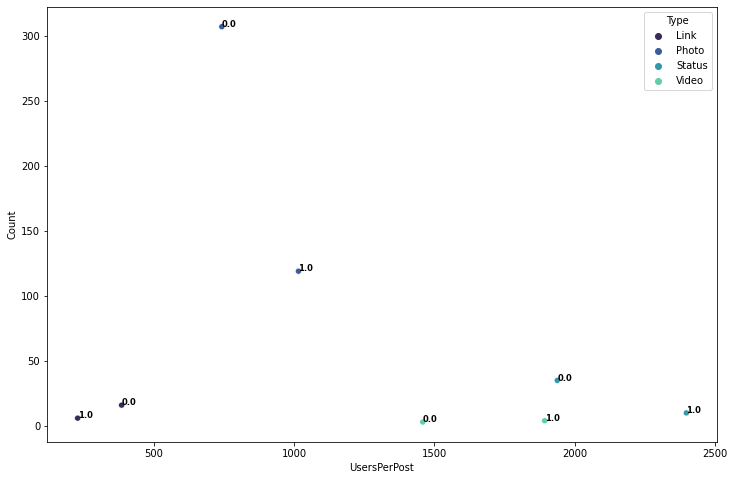

In [44]:
plt.figure(figsize=(12,8))

ax = sns.scatterplot(data = dfByPaidCampaignAndType, x = 'UsersPerPost', y = 'Count', hue='Type', palette='mako')
for i in range(dfByPaidCampaignAndType.shape[0]):
    ax.text(dfByPaidCampaignAndType.UsersPerPost.iloc[i], dfByPaidCampaignAndType.Count.iloc[i], dfByPaidCampaignAndType.Paid.iloc[i], horizontalalignment='left', size='small', color='black', weight='semibold')

### Campañas que generan más interacción con nuevos clientes

In [30]:
##
varToExplore = 'Lifetime People who have liked your Page and engaged with your post'
grouping = ['Paid', 'Type', 'CategoryType']

dfByInteractionsNewPeople = df.groupby(grouping)[varToExplore].sum().reset_index()
dfByInteractionsNewPeopleCount = df.groupby(grouping)[varToExplore].count().reset_index()

dfByInteractionsNewPeopleCount['Count'] = dfByInteractionsNewPeopleCount[varToExplore]
del dfByInteractionsNewPeopleCount[varToExplore]

dfByInteractionsNewPeople = pd.merge(dfByInteractionsNewPeople, dfByInteractionsNewPeopleCount, how='left', left_on=['Paid', 'Type', 'CategoryType'], right_on=['Paid', 'Type', 'CategoryType'])


dfByInteractionsNewPeople['UsersPerPost'] = dfByInteractionsNewPeople[varToExplore] / dfByInteractionsNewPeople.Count
dfByInteractionsNewPeople.sort_values('UsersPerPost')

,Paid,Type,CategoryType,Lifetime People who have liked your Page and engaged with your post,Count,UsersPerPost
2,0.0,Link,Product,92,1,92.000000
10,1.0,Link,Manual action,866,6,144.333333
1,0.0,Link,Manual action,3415,14,243.928571
0,0.0,Link,Inspiration,259,1,259.000000
5,0.0,Photo,Product,25139,68,369.691176
4,0.0,Photo,Manual action,66209,132,501.583333
11,1.0,Photo,Inspiration,22054,43,512.883721
3,0.0,Photo,Inspiration,56753,107,530.401869
12,1.0,Photo,Manual action,30455,53,574.622642
13,1.0,Photo,Product,15502,23,674.000000


/var/folders/0m/4905957163dg3p6x_72tp3780000gn/T/ipykernel_19580/2733478173.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(dfByInteractionsNewPeople, x='UsersPerPost', y='Type', hue='CategoryType', ci=None, palette='mako')


<AxesSubplot:xlabel='UsersPerPost', ylabel='Type'>

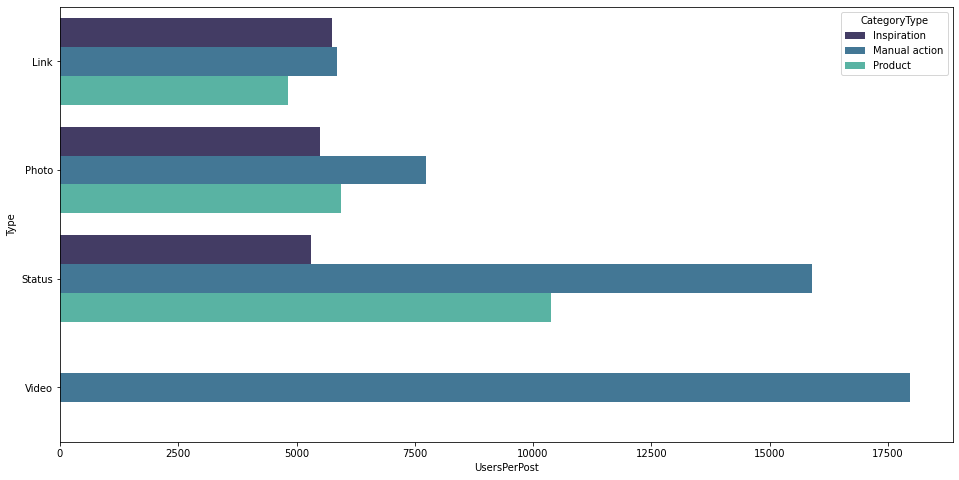

In [53]:
plt.figure(figsize=(16,8))
sns.barplot(dfByInteractionsNewPeople, x='UsersPerPost', y='Type', hue='CategoryType', ci=None, palette='mako')

### Campañas que generan más interacción con clientes actuales

In [31]:
##
varToExplore = 'Lifetime Post reach by people who like your Page'
grouping = ['Paid', 'Type', 'CategoryType']

dfByInteractionsNewPeople = df.groupby(grouping)[varToExplore].sum().reset_index()
dfByInteractionsNewPeopleCount = df.groupby(grouping)[varToExplore].count().reset_index()

dfByInteractionsNewPeopleCount['Count'] = dfByInteractionsNewPeopleCount[varToExplore]
del dfByInteractionsNewPeopleCount[varToExplore]

dfByInteractionsNewPeople = pd.merge(dfByInteractionsNewPeople, dfByInteractionsNewPeopleCount, how='left', left_on=['Paid', 'Type', 'CategoryType'], right_on=['Paid', 'Type', 'CategoryType'])


dfByInteractionsNewPeople['UsersPerPost'] = dfByInteractionsNewPeople[varToExplore] / dfByInteractionsNewPeople.Count
dfByInteractionsNewPeople.sort_values('UsersPerPost')

,Paid,Type,CategoryType,Lifetime Post reach by people who like your Page,Count,UsersPerPost
5,0.0,Photo,Product,192776,68,2834.941176
10,1.0,Link,Manual action,23035,6,3839.166667
2,0.0,Link,Product,4830,1,4830.000000
11,1.0,Photo,Inspiration,215930,43,5021.627907
6,0.0,Status,Inspiration,21206,4,5301.500000
0,0.0,Link,Inspiration,5752,1,5752.000000
3,0.0,Photo,Inspiration,641144,107,5992.000000
4,0.0,Photo,Manual action,840057,132,6364.068182
1,0.0,Link,Manual action,110359,14,7882.785714
13,1.0,Photo,Product,208086,23,9047.217391


### Interacciones en el tiempo

In [32]:
varToExplore = 'Page total likes'
grouping = ['Post Month','Month', 'Paid']

dfByTimePaidVsFree = df.groupby(grouping)[varToExplore].count().reset_index()
dfByTimePaidVsFree['Count'] = dfByTimePaidVsFree[varToExplore]
del dfByTimePaidVsFree[varToExplore]

dfByTimePaidVsFreeMax = df.groupby(grouping)[varToExplore].max().reset_index()

dfByTimePaidVsFree = pd.merge(dfByTimePaidVsFree, dfByTimePaidVsFreeMax, how='left', left_on=grouping, right_on=grouping)
dfByTimePaidVsFree

,Post Month,Month,Paid,Count,Page total likes
0,1,Jan,0.0,21,86909
1,1,Jan,1.0,4,86909
2,2,Feb,0.0,18,93577
3,2,Feb,1.0,8,93684
4,3,Mar,0.0,28,104070
5,3,Mar,1.0,8,104070
6,4,Apr,0.0,30,115893
7,4,Apr,1.0,20,115893
8,5,May,0.0,29,121540
9,5,May,1.0,8,120050


<AxesSubplot:xlabel='Month', ylabel='Count'>

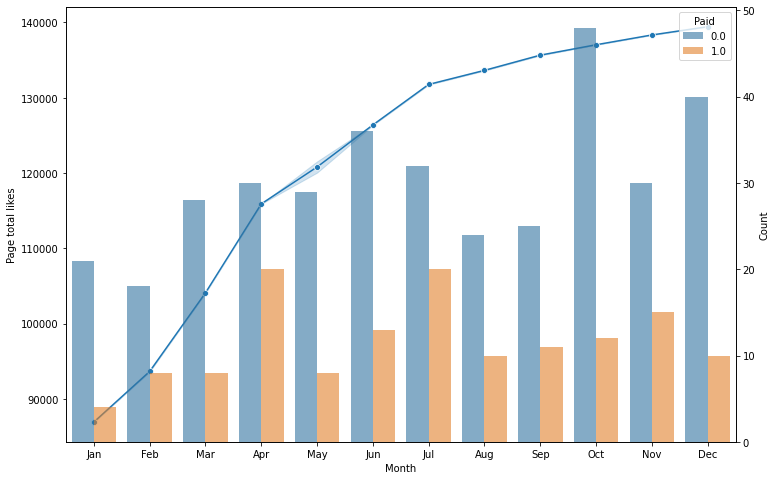

In [33]:
# grafico en el tiempo y el impacto de las campañas
fig, ax1 = plt.subplots(figsize=(12,8))
sns.lineplot(data=dfByTimePaidVsFree, x='Month', y='Page total likes', ax= ax1, marker='o')
ax2 = ax1.twinx()
sns.barplot(dfByTimePaidVsFree, x='Month', y='Count', hue='Paid', alpha=0.6)

<AxesSubplot:xlabel='Month', ylabel='Count'>

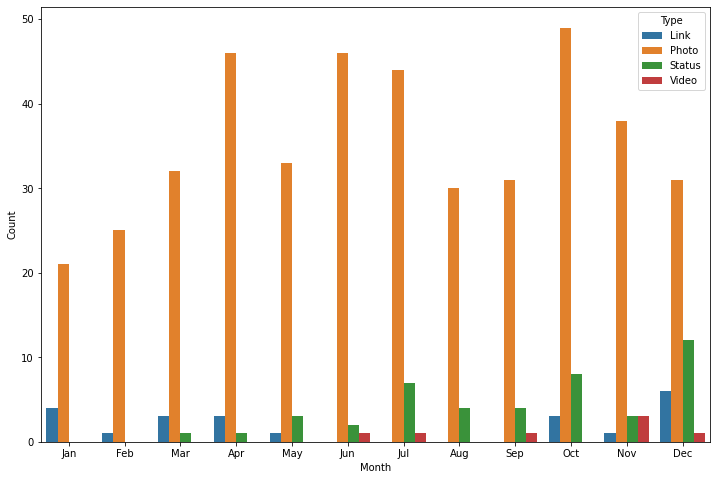

In [34]:
# Entender los tipos de posts de enero a julio
dfByType = df[df['Post Month'] < 13]
grouping = ['Post Month', 'Month', 'Type']
varToExplore = 'like'
dfByType = dfByType.groupby(grouping)[varToExplore].count().reset_index()
dfByType = dfByType.rename(columns={'like': 'Count'})

plt.figure(figsize=(12,8))
sns.barplot(data=dfByType, x = 'Month', y='Count', hue='Type')

### Insights finales de mejores estrategias y si vale la pena invertir

Usar kpis claros tomando como referencia el número gastado

In [35]:
## Finales de lo que se está haciendo bien y de lo que no está funcionando tan bien
